In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import os
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import alpaca_trade_api as tradeapi
from pathlib import Path
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv("classkeys.env")

%matplotlib inline

C:\Users\buchh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\buchh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\buchh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [3]:
# Set the Stock ticker
tickers = ["AMZN" , "TWTR" , "GOOGL" , "FB" , "MSFT" , "AAPL" , "TSLA" , "FSR" , "NVDA" , "INTC"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes
start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()

# Get data for aamzn ticker
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
stock_df.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2020-01-02 00:00:00-05:00  296.24  300.6000  295.190  300.58  30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.500  297.38  31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.78  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.27  24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.15  28984028   

                              AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2020-01-02 00:00:00-05:00  1874.79  1898.0000  1864.1500  1897.71  3583611   
2020-01-03 00:00:00-05:00  1864.50  1886.1965  1864.5000  1874.93  3293469   
2020-01-06 00:00:00-05:00  1860.00  1903.6900  1860.0000  1903.33  3598872   
2020-01-07 00:00:00-05:00  1904.50  1913.8900  1892.0433  1906.86  3638680   
2020-01-08 00:00:00-05:00  1898.68  1910.9999  1886.4448  1892.09  3032612   

                           ...    TSLA                                         \
                           ...    open      high      low     close    volume   
time                       ...                                                  
2020-01-02 00:00:00-05:00  ...  424.95  430.6957  421.710  430.2400   9113793   
2020-01-03 00:00:00-05:00  ...  440.50  454.0000  436.920  442.7500  16409329   
2020-01-06 00:00:00-05:00  ...  440.47  451.5600  440.000  451.4001   9807049   
2020-01-07 00:00:00-05:00  ...  461.40  471.6300  453.355  469.1700  17164802   
2020-01-08 00:00:00-05:00  ...  473.70  498.4900  468.230  492.0900  29492388   

                             TWTR                                    
                             open    high    low  close      volume  
time                                                                 
2020-01-02 00:00:00-05:00  32.310  32.500  31.96  32.30   9528140.0  
2020-01-03 00:00:00-05:00  31.710  32.100  31.26  31.51  12785119.0  
2020-01-06 00:00:00-05:00  31.230  31.710  31.16  31.64  10273996.0  
2020-01-07 00:00:00-05:00  31.800  32.695  31.72  32.54  11899034.0  
2020-01-08 00:00:00-05:00  32.443  33.400  32.41  33.05  12414273.0  

[5 rows x 50 columns]

In [4]:
# Create and empty DataFrame for closing prices
nvda_closing_prices = pd.DataFrame()

# fetch closing prices
nvda_closing_prices["NVDA"] = stock_df["NVDA"]["close"]

# Drop the time component of the date
nvda_closing_prices.index = nvda_closing_prices.index.date

# Compute daily returns
nvda_daily_returns = nvda_closing_prices.pct_change().dropna()
nvda_daily_returns.head()

NVDA
2020-01-03 -0.015926
2020-01-06  0.004194
2020-01-07  0.012277
2020-01-08  0.002292
2020-01-09  0.010520

In [5]:
# Create and empty DataFrame for closing prices
Amzn_closing_prices = pd.DataFrame()

# fetch closing prices
Amzn_closing_prices["AMZN"] = stock_df["AMZN"]["close"]

# Drop the time component of the date
Amzn_closing_prices.index = Amzn_closing_prices.index.date

# Compute daily returns
Amzn_daily_returns = Amzn_closing_prices.pct_change().dropna()
Amzn_daily_returns.head()

AMZN
2020-01-03 -0.012004
2020-01-06  0.015147
2020-01-07  0.001855
2020-01-08 -0.007746
2020-01-09  0.004709

In [6]:
# Create and empty DataFrame for closing prices
aapl_closing_prices = pd.DataFrame()

# fetch closing prices
aapl_closing_prices["AAPL"] = stock_df["AAPL"]["close"]

# Drop the time component of the date
aapl_closing_prices.index = aapl_closing_prices.index.date

# Compute daily returns
aapl_daily_returns = aapl_closing_prices.pct_change().dropna()
aapl_daily_returns.head()

AAPL
2020-01-03 -0.010646
2020-01-06  0.008070
2020-01-07 -0.005037
2020-01-08  0.016361
2020-01-09  0.021639

In [7]:
# Create and empty DataFrame for closing prices
tsla_closing_prices = pd.DataFrame()

# fetch closing prices
tsla_closing_prices["TSLA"] = stock_df["TSLA"]["close"]

# Drop the time component of the date
tsla_closing_prices.index = tsla_closing_prices.index.date

# Compute daily returns
tsla_daily_returns = tsla_closing_prices.pct_change().dropna()
tsla_daily_returns.head()

TSLA
2020-01-03  0.029077
2020-01-06  0.019537
2020-01-07  0.039366
2020-01-08  0.048852
2020-01-09 -0.021541

In [8]:
# Create and empty DataFrame for closing prices
googl_closing_prices = pd.DataFrame()

# fetch closing prices
googl_closing_prices["GOOGL"] = stock_df["GOOGL"]["close"]

# Drop the time component of the date
googl_closing_prices.index = googl_closing_prices.index.date

# Compute daily returns
googl_daily_returns = googl_closing_prices.pct_change().dropna()
googl_daily_returns.head()

GOOGL
2020-01-03 -0.006050
2020-01-06  0.027220
2020-01-07 -0.001345
2020-01-08  0.007115
2020-01-09  0.010438

In [9]:
# Create and empty DataFrame for closing prices
fb_closing_prices = pd.DataFrame()

# fetch closing prices
fb_closing_prices["FB"] = stock_df["FB"]["close"]

# Drop the time component of the date
fb_closing_prices.index = fb_closing_prices.index.date

# Compute daily returns
fb_daily_returns =fb_closing_prices.pct_change().dropna()
fb_daily_returns.head()

FB
2020-01-03 -0.006054
2020-01-06  0.019546
2020-01-07  0.002185
2020-01-08  0.010561
2020-01-09  0.013980

In [10]:
# Create and empty DataFrame for closing prices
msft_closing_prices = pd.DataFrame()

# fetch closing prices
msft_closing_prices["MSFT"] = stock_df["MSFT"]["close"]

# Drop the time component of the date
msft_closing_prices.index = msft_closing_prices.index.date

# Compute daily returns
msft_daily_returns = msft_closing_prices.pct_change().dropna()
msft_daily_returns.head()

MSFT
2020-01-03 -0.013314
2020-01-06  0.002711
2020-01-07 -0.008930
2020-01-08  0.016117
2020-01-09  0.012177

In [11]:
# Create and empty DataFrame for closing prices
twtr_closing_prices = pd.DataFrame()

# fetch closing prices
twtr_closing_prices["TWTR"] = stock_df["TWTR"]["close"]

# Drop the time component of the date
twtr_closing_prices.index =twtr_closing_prices.index.date

# Compute daily returns
twtr_daily_returns = twtr_closing_prices.pct_change().dropna()
twtr_daily_returns.head()

TWTR
2020-01-03 -0.024458
2020-01-06  0.004126
2020-01-07  0.028445
2020-01-08  0.015673
2020-01-09  0.005144

In [12]:
# Create and empty DataFrame for closing prices
fsr_closing_prices = pd.DataFrame()

# fetch closing prices
fsr_closing_prices["FSR"] = stock_df["FSR"]["close"]

# Drop the time component of the date
fsr_closing_prices.index =fsr_closing_prices.index.date

# Compute daily returns
fsr_daily_returns = fsr_closing_prices.pct_change().dropna()
fsr_daily_returns.head()

FSR
2020-11-02  0.111111
2020-11-03  0.028000
2020-11-04 -0.058228
2020-11-05  0.010046
2020-11-06 -0.017186

In [13]:
# Create and empty DataFrame for closing prices
intc_closing_prices = pd.DataFrame()

# fetch closing prices
intc_closing_prices["INTC"] = stock_df["INTC"]["close"]

# Drop the time component of the date
intc_closing_prices.index =intc_closing_prices.index.date

# Compute daily returns
intc_daily_returns = intc_closing_prices.pct_change().dropna()
intc_daily_returns.head()

INTC
2020-01-03 -0.012327
2020-01-06 -0.002663
2020-01-07 -0.016770
2020-01-08  0.000764
2020-01-09  0.005596

In [14]:
# Daily  returns contain closing price of all stock

stock_daily_returns_df = pd.concat([intc_daily_returns,fsr_daily_returns, twtr_daily_returns, msft_daily_returns, aapl_daily_returns, Amzn_daily_returns, googl_daily_returns, tsla_daily_returns, fb_daily_returns, nvda_daily_returns], axis=1, join="inner")

stock_daily_returns_df.tail()

INTC       FSR      TWTR      MSFT      AAPL      AMZN  \
2022-01-14  0.013464 -0.008000 -0.006975  0.017049  0.004236  0.005405   
2022-01-18 -0.016338 -0.051747 -0.029396 -0.023952 -0.018607 -0.019714   
2022-01-19 -0.021902 -0.048901  0.001072  0.001784 -0.021315 -0.016646   
2022-01-20 -0.028923 -0.052161 -0.002142 -0.005506 -0.010168 -0.029486   
2022-01-21 -0.000384 -0.055818 -0.065737 -0.018996 -0.013190 -0.060081   

               GOOGL      TSLA        FB      NVDA  
2022-01-14  0.005146  0.017718  0.016475  0.013616  
2022-01-18 -0.023933 -0.018450 -0.041122 -0.038778  
2022-01-19 -0.006723 -0.033837  0.004147 -0.032467  
2022-01-20 -0.013359  0.000542 -0.009543 -0.036310  
2022-01-21 -0.023265 -0.053228 -0.042709 -0.033165

In [15]:
stock_daily_returns_df['INTC'].std()

0.019588284896985154

In [16]:
volatility = stock_daily_returns_df.std().sort_values()

In [17]:
split = round(len(volatility) / 3) 

high = volatility[len(volatility) - split:]
mid = volatility[len(volatility) - 2 * split :len(volatility) - split]
low = volatility[:len(volatility) - 2 * split]

In [18]:
mid_list = mid.index.tolist()
mid_list

['FB', 'INTC', 'TWTR']

In [19]:
high_list = high.index.tolist()
high_list

['TSLA', 'NVDA', 'FSR']

In [20]:
low_list = low.index.tolist()
low_list

['MSFT', 'GOOGL', 'AAPL', 'AMZN']

In [21]:
# Daily  returns contain closing price of all stock

stock_daily_returns_df = pd.concat([intc_daily_returns,fsr_daily_returns, twtr_daily_returns, msft_daily_returns, aapl_daily_returns, Amzn_daily_returns, googl_daily_returns, tsla_daily_returns, fb_daily_returns, nvda_daily_returns], axis=1, join="inner")

stock_daily_returns_df.tail()

INTC       FSR      TWTR      MSFT      AAPL      AMZN  \
2022-01-14  0.013464 -0.008000 -0.006975  0.017049  0.004236  0.005405   
2022-01-18 -0.016338 -0.051747 -0.029396 -0.023952 -0.018607 -0.019714   
2022-01-19 -0.021902 -0.048901  0.001072  0.001784 -0.021315 -0.016646   
2022-01-20 -0.028923 -0.052161 -0.002142 -0.005506 -0.010168 -0.029486   
2022-01-21 -0.000384 -0.055818 -0.065737 -0.018996 -0.013190 -0.060081   

               GOOGL      TSLA        FB      NVDA  
2022-01-14  0.005146  0.017718  0.016475  0.013616  
2022-01-18 -0.023933 -0.018450 -0.041122 -0.038778  
2022-01-19 -0.006723 -0.033837  0.004147 -0.032467  
2022-01-20 -0.013359  0.000542 -0.009543 -0.036310  
2022-01-21 -0.023265 -0.053228 -0.042709 -0.033165

In [22]:
stock_daily_returns_df.plot

In [23]:
# compute the standard deviation of the excess return here as risk free rate
volatility = stock_daily_returns_df.std().sort_values()

low_group = volatility.iloc[:3].index.tolist()
mod_group = volatility.iloc[3:6].index.tolist()
high_group = volatility.iloc[6:].index.tolist()

ref_risk_dict = {
    'high' : high_group,
    'moderate' : mod_group,
    'low' : low_group
}


# calculare sharpe ratio
stock_sharpe = stock_daily_returns_df.mean() / stock_daily_returns_df.std()


print(stock_sharpe)

INTC     0.036553
FSR      0.037215
TWTR    -0.007044
MSFT     0.095806
AAPL     0.088608
AMZN    -0.004629
GOOGL    0.108894
TSLA     0.097960
FB       0.033141
NVDA    -0.000185
dtype: float64


In [24]:
stock_daily_returns_df[ref_risk_dict.get("high")]

TWTR      TSLA      NVDA       FSR
2020-11-02 -0.046169  0.032136  0.001961  0.111111
2020-11-03  0.057271  0.058001  0.034607  0.028000
2020-11-04  0.024451 -0.006679  0.059506 -0.058228
2020-11-05  0.022227  0.040816  0.026514  0.010046
2020-11-06 -0.013046 -0.018649  0.028566 -0.017186
...              ...       ...       ...       ...
2022-01-14 -0.006975  0.017718  0.013616 -0.008000
2022-01-18 -0.029396 -0.018450 -0.038778 -0.051747
2022-01-19  0.001072 -0.033837 -0.032467 -0.048901
2022-01-20 -0.002142  0.000542 -0.036310 -0.052161
2022-01-21 -0.065737 -0.053228 -0.033165 -0.055818

[308 rows x 4 columns]

In [25]:
stock_daily_returns_df[ref_risk_dict.get("moderate")]

AMZN        FB      INTC
2020-11-02 -0.010424 -0.008607  0.003938
2020-11-03  0.013903  0.013768  0.008434
2020-11-04  0.063984  0.084390  0.019179
2020-11-05  0.024942  0.025274 -0.000438
2020-11-06 -0.003489 -0.004428 -0.006349
...              ...       ...       ...
2022-01-14  0.005405  0.016475  0.013464
2022-01-18 -0.019714 -0.041122 -0.016338
2022-01-19 -0.016646  0.004147 -0.021902
2022-01-20 -0.029486 -0.009543 -0.028923
2022-01-21 -0.060081 -0.042709 -0.000384

[308 rows x 3 columns]

In [26]:
stock_daily_returns_df[ref_risk_dict.get("low")]

MSFT     GOOGL      AAPL
2020-11-02 -0.001283  0.004275 -0.001194
2020-11-03  0.018782  0.012519  0.014756
2020-11-04  0.049486  0.063006  0.041359
2020-11-05  0.032221  0.008912  0.035236
2020-11-06  0.001478 -0.001821 -0.002563
...              ...       ...       ...
2022-01-14  0.017049  0.005146  0.004236
2022-01-18 -0.023952 -0.023933 -0.018607
2022-01-19  0.001784 -0.006723 -0.021315
2022-01-20 -0.005506 -0.013359 -0.010168
2022-01-21 -0.018996 -0.023265 -0.013190

[308 rows x 3 columns]

In [27]:
temp_df = stock_daily_returns_df[ref_risk_dict.get('moderate')]
temp_df

AMZN        FB      INTC
2020-11-02 -0.010424 -0.008607  0.003938
2020-11-03  0.013903  0.013768  0.008434
2020-11-04  0.063984  0.084390  0.019179
2020-11-05  0.024942  0.025274 -0.000438
2020-11-06 -0.003489 -0.004428 -0.006349
...              ...       ...       ...
2022-01-14  0.005405  0.016475  0.013464
2022-01-18 -0.019714 -0.041122 -0.016338
2022-01-19 -0.016646  0.004147 -0.021902
2022-01-20 -0.029486 -0.009543 -0.028923
2022-01-21 -0.060081 -0.042709 -0.000384

[308 rows x 3 columns]

In [28]:
stock_daily_returns_df
#stock_daily_returns_df['stock_daily_returns_std'].describe()

INTC       FSR      TWTR      MSFT      AAPL      AMZN  \
2020-11-02  0.003938  0.111111 -0.046169 -0.001283 -0.001194 -0.010424   
2020-11-03  0.008434  0.028000  0.057271  0.018782  0.014756  0.013903   
2020-11-04  0.019179 -0.058228  0.024451  0.049486  0.041359  0.063984   
2020-11-05 -0.000438  0.010046  0.022227  0.032221  0.035236  0.024942   
2020-11-06 -0.006349 -0.017186 -0.013046  0.001478 -0.002563 -0.003489   
...              ...       ...       ...       ...       ...       ...   
2022-01-14  0.013464 -0.008000 -0.006975  0.017049  0.004236  0.005405   
2022-01-18 -0.016338 -0.051747 -0.029396 -0.023952 -0.018607 -0.019714   
2022-01-19 -0.021902 -0.048901  0.001072  0.001784 -0.021315 -0.016646   
2022-01-20 -0.028923 -0.052161 -0.002142 -0.005506 -0.010168 -0.029486   
2022-01-21 -0.000384 -0.055818 -0.065737 -0.018996 -0.013190 -0.060081   

               GOOGL      TSLA        FB      NVDA  
2020-11-02  0.004275  0.032136 -0.008607  0.001961  
2020-11-03  0.012519  0.058001  0.013768  0.034607  
2020-11-04  0.063006 -0.006679  0.084390  0.059506  
2020-11-05  0.008912  0.040816  0.025274  0.026514  
2020-11-06 -0.001821 -0.018649 -0.004428  0.028566  
...              ...       ...       ...       ...  
2022-01-14  0.005146  0.017718  0.016475  0.013616  
2022-01-18 -0.023933 -0.018450 -0.041122 -0.038778  
2022-01-19 -0.006723 -0.033837  0.004147 -0.032467  
2022-01-20 -0.013359  0.000542 -0.009543 -0.036310  
2022-01-21 -0.023265 -0.053228 -0.042709 -0.033165  

[308 rows x 10 columns]

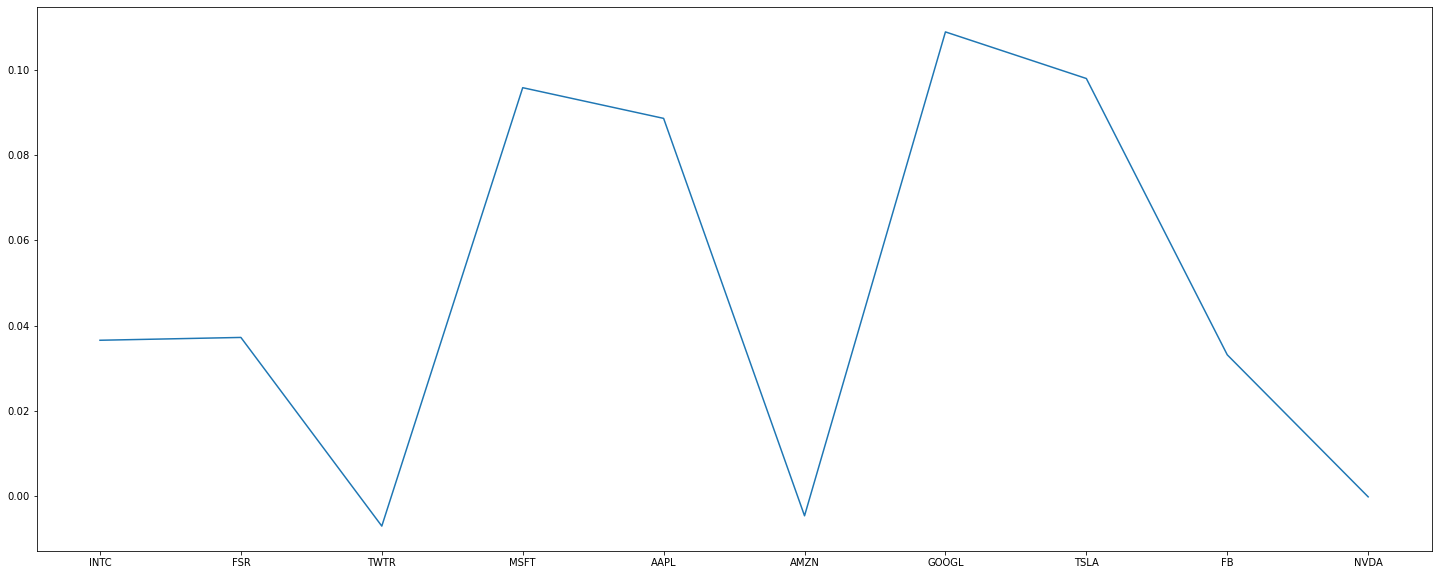

In [29]:
plt.figure(figsize=(25, 10))
plt.plot(stock_sharpe);

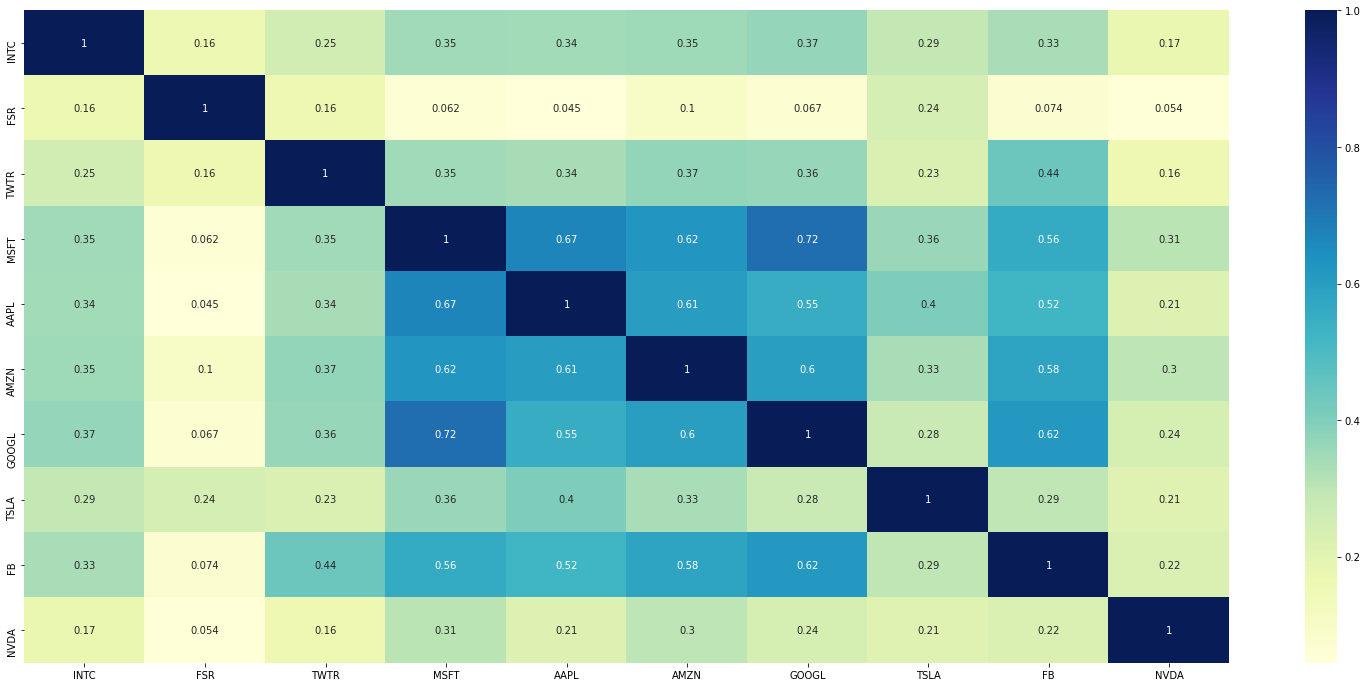

In [30]:
# Correlation between the stocks daily returns
plt.figure(figsize=(27, 12))
sns.heatmap(stock_daily_returns_df.corr(), annot=True, cmap="YlGnBu");

In [31]:
stock_daily_returns_df["Date"]= stock_daily_returns_df.index
stock_daily_returns_df

INTC       FSR      TWTR      MSFT      AAPL      AMZN  \
2020-11-02  0.003938  0.111111 -0.046169 -0.001283 -0.001194 -0.010424   
2020-11-03  0.008434  0.028000  0.057271  0.018782  0.014756  0.013903   
2020-11-04  0.019179 -0.058228  0.024451  0.049486  0.041359  0.063984   
2020-11-05 -0.000438  0.010046  0.022227  0.032221  0.035236  0.024942   
2020-11-06 -0.006349 -0.017186 -0.013046  0.001478 -0.002563 -0.003489   
...              ...       ...       ...       ...       ...       ...   
2022-01-14  0.013464 -0.008000 -0.006975  0.017049  0.004236  0.005405   
2022-01-18 -0.016338 -0.051747 -0.029396 -0.023952 -0.018607 -0.019714   
2022-01-19 -0.021902 -0.048901  0.001072  0.001784 -0.021315 -0.016646   
2022-01-20 -0.028923 -0.052161 -0.002142 -0.005506 -0.010168 -0.029486   
2022-01-21 -0.000384 -0.055818 -0.065737 -0.018996 -0.013190 -0.060081   

               GOOGL      TSLA        FB      NVDA        Date  
2020-11-02  0.004275  0.032136 -0.008607  0.001961  2020-11-02  
2020-11-03  0.012519  0.058001  0.013768  0.034607  2020-11-03  
2020-11-04  0.063006 -0.006679  0.084390  0.059506  2020-11-04  
2020-11-05  0.008912  0.040816  0.025274  0.026514  2020-11-05  
2020-11-06 -0.001821 -0.018649 -0.004428  0.028566  2020-11-06  
...              ...       ...       ...       ...         ...  
2022-01-14  0.005146  0.017718  0.016475  0.013616  2022-01-14  
2022-01-18 -0.023933 -0.018450 -0.041122 -0.038778  2022-01-18  
2022-01-19 -0.006723 -0.033837  0.004147 -0.032467  2022-01-19  
2022-01-20 -0.013359  0.000542 -0.009543 -0.036310  2022-01-20  
2022-01-21 -0.023265 -0.053228 -0.042709 -0.033165  2022-01-21  

[308 rows x 11 columns]

In [32]:
stock_daily_returns_df= stock_daily_returns_df.reset_index(drop=True)
stock_daily_returns_df

INTC       FSR      TWTR      MSFT      AAPL      AMZN     GOOGL  \
0    0.003938  0.111111 -0.046169 -0.001283 -0.001194 -0.010424  0.004275   
1    0.008434  0.028000  0.057271  0.018782  0.014756  0.013903  0.012519   
2    0.019179 -0.058228  0.024451  0.049486  0.041359  0.063984  0.063006   
3   -0.000438  0.010046  0.022227  0.032221  0.035236  0.024942  0.008912   
4   -0.006349 -0.017186 -0.013046  0.001478 -0.002563 -0.003489 -0.001821   
..        ...       ...       ...       ...       ...       ...       ...   
303  0.013464 -0.008000 -0.006975  0.017049  0.004236  0.005405  0.005146   
304 -0.016338 -0.051747 -0.029396 -0.023952 -0.018607 -0.019714 -0.023933   
305 -0.021902 -0.048901  0.001072  0.001784 -0.021315 -0.016646 -0.006723   
306 -0.028923 -0.052161 -0.002142 -0.005506 -0.010168 -0.029486 -0.013359   
307 -0.000384 -0.055818 -0.065737 -0.018996 -0.013190 -0.060081 -0.023265   

         TSLA        FB      NVDA        Date  
0    0.032136 -0.008607  0.001961  2020-11-02  
1    0.058001  0.013768  0.034607  2020-11-03  
2   -0.006679  0.084390  0.059506  2020-11-04  
3    0.040816  0.025274  0.026514  2020-11-05  
4   -0.018649 -0.004428  0.028566  2020-11-06  
..        ...       ...       ...         ...  
303  0.017718  0.016475  0.013616  2022-01-14  
304 -0.018450 -0.041122 -0.038778  2022-01-18  
305 -0.033837  0.004147 -0.032467  2022-01-19  
306  0.000542 -0.009543 -0.036310  2022-01-20  
307 -0.053228 -0.042709 -0.033165  2022-01-21  

[308 rows x 11 columns]

In [33]:
stock_daily_returns_df=stock_daily_returns_df.set_index('Date')
stock_daily_returns_df

INTC       FSR      TWTR      MSFT      AAPL      AMZN  \
Date                                                                     
2020-11-02  0.003938  0.111111 -0.046169 -0.001283 -0.001194 -0.010424   
2020-11-03  0.008434  0.028000  0.057271  0.018782  0.014756  0.013903   
2020-11-04  0.019179 -0.058228  0.024451  0.049486  0.041359  0.063984   
2020-11-05 -0.000438  0.010046  0.022227  0.032221  0.035236  0.024942   
2020-11-06 -0.006349 -0.017186 -0.013046  0.001478 -0.002563 -0.003489   
...              ...       ...       ...       ...       ...       ...   
2022-01-14  0.013464 -0.008000 -0.006975  0.017049  0.004236  0.005405   
2022-01-18 -0.016338 -0.051747 -0.029396 -0.023952 -0.018607 -0.019714   
2022-01-19 -0.021902 -0.048901  0.001072  0.001784 -0.021315 -0.016646   
2022-01-20 -0.028923 -0.052161 -0.002142 -0.005506 -0.010168 -0.029486   
2022-01-21 -0.000384 -0.055818 -0.065737 -0.018996 -0.013190 -0.060081   

               GOOGL      TSLA        FB      NVDA  
Date                                                
2020-11-02  0.004275  0.032136 -0.008607  0.001961  
2020-11-03  0.012519  0.058001  0.013768  0.034607  
2020-11-04  0.063006 -0.006679  0.084390  0.059506  
2020-11-05  0.008912  0.040816  0.025274  0.026514  
2020-11-06 -0.001821 -0.018649 -0.004428  0.028566  
...              ...       ...       ...       ...  
2022-01-14  0.005146  0.017718  0.016475  0.013616  
2022-01-18 -0.023933 -0.018450 -0.041122 -0.038778  
2022-01-19 -0.006723 -0.033837  0.004147 -0.032467  
2022-01-20 -0.013359  0.000542 -0.009543 -0.036310  
2022-01-21 -0.023265 -0.053228 -0.042709 -0.033165  

[308 rows x 10 columns]

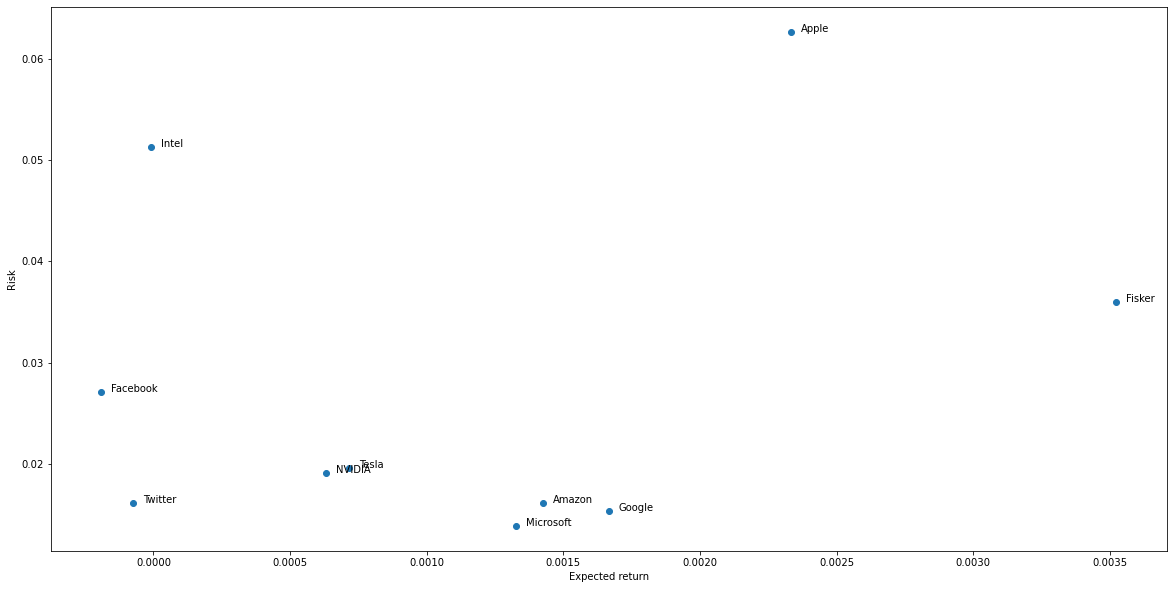

In [34]:
returns = stock_daily_returns_df.dropna()

Companies  = ["Tesla", "Apple", "Facebook", "Microsoft", 'Amazon',  "Twitter" ,  "Google" , "Fisker"  ,  "NVIDIA" ,  "Intel"]
plt.figure(figsize=(20, 10))
plt.scatter(returns.mean(), returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(Companies, returns.mean(), returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')